In [1]:
from hdbscan import HDBSCAN as OGHDBSCAN
from sklearn.cluster import HDBSCAN as SKHDBSCAN

from sklearn.datasets import make_blobs
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import sklearn

sklearn.__version__

'1.6.1'

In [3]:
X, y = make_blobs(
    n_samples=10000, centers=5, cluster_std=0.60, random_state=0, n_features=10
)

d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


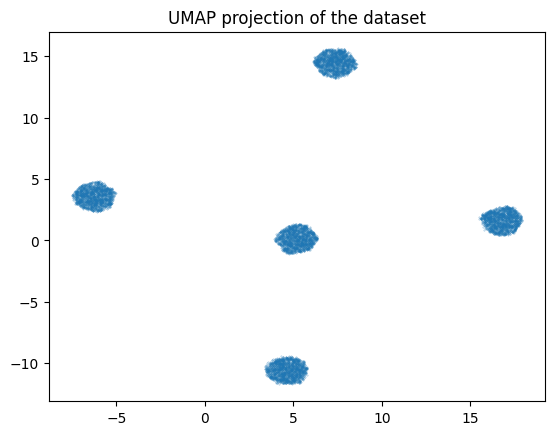

In [4]:
from umap import UMAP

reducer = UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, alpha=0.5)
plt.title("UMAP projection of the dataset")
plt.show()

In [5]:
og_hdbscan = OGHDBSCAN(core_dist_n_jobs=-1)
sk_hdbscan = SKHDBSCAN(n_jobs=-1)

In [6]:
og_hdbscan.fit(X)

d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN(core_dist_n_jobs=-1)

In [7]:
sk_hdbscan.fit(X)

HDBSCAN(n_jobs=-1)

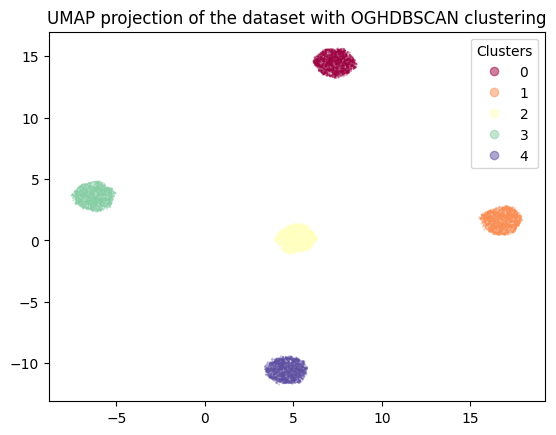

In [8]:
ax = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=0.1,
    alpha=0.5,
    c=og_hdbscan.labels_,
    cmap="Spectral",
)
plt.title("UMAP projection of the dataset with OGHDBSCAN clustering")
plt.legend(*ax.legend_elements(), title="Clusters")
plt.show()

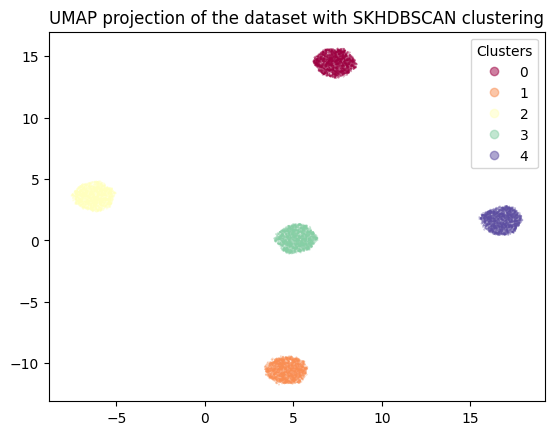

In [9]:
ax = plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=0.1,
    alpha=0.5,
    c=sk_hdbscan.labels_,
    cmap="Spectral",
)
plt.title("UMAP projection of the dataset with SKHDBSCAN clustering")
plt.legend(*ax.legend_elements(), title="Clusters")
plt.show()

In [10]:
RUNS = 10

In [11]:
import time


def time_hdbscan(hdbscan, X, runs):
    times = []
    for _ in range(runs):
        start = time.time()
        hdbscan.fit(X)
        end = time.time()
        times.append(end - start)
    return times

In [12]:
time.sleep(2)  # Ensure the time module is ready

times_og = time_hdbscan(og_hdbscan, X, RUNS)
times_sk = time_hdbscan(sk_hdbscan, X, RUNS)

d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Documents\Projects\Machine-Learning-Basics\.venv\Lib\site-packages\sklearn\utils\deprecation.py:1

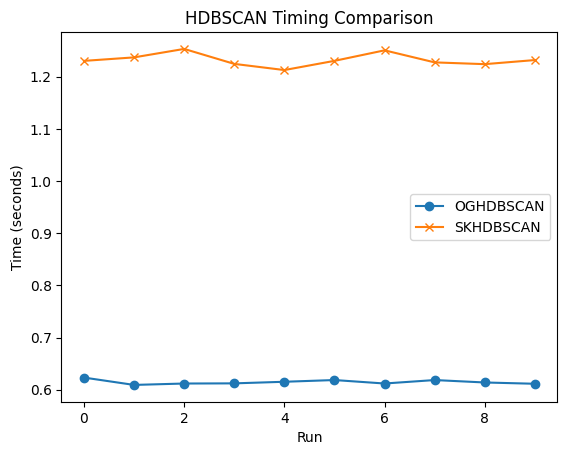

In [13]:
plt.plot(range(RUNS), times_og, label="OGHDBSCAN", marker="o")
plt.plot(range(RUNS), times_sk, label="SKHDBSCAN", marker="x")
plt.xlabel("Run")
plt.ylabel("Time (seconds)")
plt.title("HDBSCAN Timing Comparison")
plt.legend()
plt.show()

In [14]:
print("Mean time OGHDBSCAN: ", np.mean(times_og))
print("Mean time SKHDBSCAN: ", np.mean(times_sk))

Mean time OGHDBSCAN:  0.6147237062454224
Mean time SKHDBSCAN:  1.2321300983428956
